# 4. Exploración de Datasets Finales

Este notebook explora los datasets finales creados por el pipeline de ciencia de datos, incluyendo:
- Datasets normalizados
- Features temporales avanzadas
- Datasets para modelado
- Análisis de calidad de datos


In [9]:
# Inicializar Kedro
import sys
import os
from pathlib import Path

# Ruta absoluta al directorio del proyecto
project_root = Path(r'C:\ProyectoML2\proyecto-ml')
os.chdir(project_root)
sys.path.append('src')

from kedro.framework.session import KedroSession
from kedro.framework.startup import bootstrap_project

# Bootstrap del proyecto
bootstrap_project('.')

# Crear sesión
session = KedroSession.create()
context = session.load_context()
catalog = context.catalog
params = context.params

print("Kedro inicializado correctamente")
print(f"Parametros cargados: {len(params)} secciones")
print("Catalogo disponible: Datasets cargados correctamente")


[09/24/25 14:35:12] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=536954;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=29905;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

Kedro inicializado correctamente
Parametros cargados: 10 secciones
Catalogo disponible: Datasets cargados correctamente


In [10]:
# Cargar datasets finales
try:
    datasets_finales = catalog.load('datasets_finales_modelado')
    print(" Datasets finales cargados exitosamente")
    print(f" Tipos de datasets: {list(datasets_finales.keys())}")
except Exception as e:
    print(f" Error cargando datasets finales: {e}")
    datasets_finales = None


[09/24/25 14:35:25] INFO     Loading data from datasets_finales_modelado (PickleDataset)...    ]8;id=261163;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=470248;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

 Datasets finales cargados exitosamente
 Tipos de datasets: ['dataset_regresion', 'dataset_temporal', 'dataset_indexado', 'dataset_resumido', 'dataset_completo']


In [11]:
# Explorar dataset de regresión
if datasets_finales and 'dataset_regresion' in datasets_finales:
    df_regresion = datasets_finales['dataset_regresion']
    print(" DATASET DE REGRESIÓN")
    print(f"Forma: {df_regresion.shape}")
    print(f"Columnas: {list(df_regresion.columns)}")
    print("\n Primeras 5 filas:")
    print(df_regresion.head())
    print("\n Estadísticas descriptivas:")
    print(df_regresion.describe())


 DATASET DE REGRESIÓN
Forma: (1246214, 19)
Columnas: ['año', 'mes', 'trimestre', 'dia_año', 'mes_sin', 'mes_cos', 'dia_año_sin', 'dia_año_cos', 'trimestre_sin', 'trimestre_cos', 'dia_semana_sin', 'dia_semana_cos', 'es_fin_semana', 'es_invierno', 'es_verano', 'trimestre_fiscal', 'epoca_año_codificada', 'año_normalizado', 'decada']

 Primeras 5 filas:
    año       mes  trimestre   dia_año   mes_sin   mes_cos  dia_año_sin  \
0  2015 -1.640075  -1.373906 -1.672991  0.736434  1.317127     0.262049   
1  2016 -1.640075  -1.373906 -1.475639  0.736434  1.317127     0.721470   
2  2019  0.470732   0.483128  0.389339 -1.212729 -0.607356    -0.870359   
3  2015 -1.338531  -1.373906 -1.307889  1.258711  0.801463     1.046556   
4  2015 -1.640075  -1.373906 -1.751932  0.736434  1.317127     0.066196   

   dia_año_cos  trimestre_sin  trimestre_cos  dia_semana_sin  dia_semana_cos  \
0     1.471543       1.456697       0.070268       -0.002207        1.408159   
1     1.301695       1.456697       0

In [12]:
# Explorar dataset temporal
if datasets_finales and 'dataset_temporal' in datasets_finales:
    df_temporal = datasets_finales['dataset_temporal']
    print(" DATASET TEMPORAL")
    print(f"Forma: {df_temporal.shape}")
    print(f"Columnas: {list(df_temporal.columns)}")
    print("\n Primeras 5 filas:")
    print(df_temporal.head())
    print("\n Estadísticas descriptivas:")
    print(df_temporal.describe())


 DATASET TEMPORAL
Forma: (1246214, 32)
Columnas: ['año', 'fecha_defuncion', 'sexo', 'tipo_edad', 'edad_cantidad', 'codigo_comuna', 'comuna', 'region', 'codigo_diagnostico', 'descripcion_diagnostico', 'año_fecha', 'mes', 'dia_semana', 'trimestre', 'dia_año', 'mes_sin', 'mes_cos', 'dia_año_sin', 'dia_año_cos', 'trimestre_sin', 'trimestre_cos', 'dia_semana_codificado', 'dia_semana_sin', 'dia_semana_cos', 'es_fin_semana', 'es_invierno', 'es_verano', 'trimestre_fiscal', 'epoca_año_codificada', 'año_normalizado', 'decada', 'indice_temporal']

 Primeras 5 filas:
         año fecha_defuncion    sexo  tipo_edad  edad_cantidad  codigo_comuna  \
42366   2014      2014-01-01  Hombre  -0.101475       0.467343        13118.0   
123777  2014      2014-01-01   Mujer  -0.101475       0.520534        14101.0   
69783   2014      2014-01-01  Hombre  -0.101475      -0.756036         2302.0   
102924  2014      2014-01-01  Hombre  -0.101475      -1.287940         3102.0   
3191    2014      2014-01-01  Hom

In [ ]:
# Explorar dataset resumido
if datasets_finales and 'dataset_resumido' in datasets_finales:
    df_resumido = datasets_finales['dataset_resumido']
    print("📊 DATASET RESUMIDO")
    print(f"Forma: {df_resumido.shape}")
    print(f"Columnas: {list(df_resumido.columns)}")
    print("\n📈 Primeras 5 filas:")
    print(df_resumido.head())
    print("\n📊 Estadísticas descriptivas:")
    print(df_resumido.describe())


In [13]:
# Cargar dataset con features temporales
try:
    df_features = catalog.load('dataset_con_features_temporales')
    print(" Dataset con features temporales cargado")
    print(f"Forma: {df_features.shape}")
    print(f"Columnas: {list(df_features.columns)}")
except Exception as e:
    print(f" Error cargando features temporales: {e}")
    df_features = None


[09/24/25 14:36:05] INFO     Loading data from dataset_con_features_temporales (CSVDataset)... ]8;id=137685;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=34125;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

 Dataset con features temporales cargado
Forma: (1246214, 31)
Columnas: ['año', 'fecha_defuncion', 'sexo', 'tipo_edad', 'edad_cantidad', 'codigo_comuna', 'comuna', 'region', 'codigo_diagnostico', 'descripcion_diagnostico', 'año_fecha', 'mes', 'dia_semana', 'trimestre', 'dia_año', 'mes_sin', 'mes_cos', 'dia_año_sin', 'dia_año_cos', 'trimestre_sin', 'trimestre_cos', 'dia_semana_codificado', 'dia_semana_sin', 'dia_semana_cos', 'es_fin_semana', 'es_invierno', 'es_verano', 'trimestre_fiscal', 'epoca_año_codificada', 'año_normalizado', 'decada']


 Features cíclicos encontrados: 8
Lista: ['mes_sin', 'mes_cos', 'dia_año_sin', 'dia_año_cos', 'trimestre_sin', 'trimestre_cos', 'dia_semana_sin', 'dia_semana_cos']


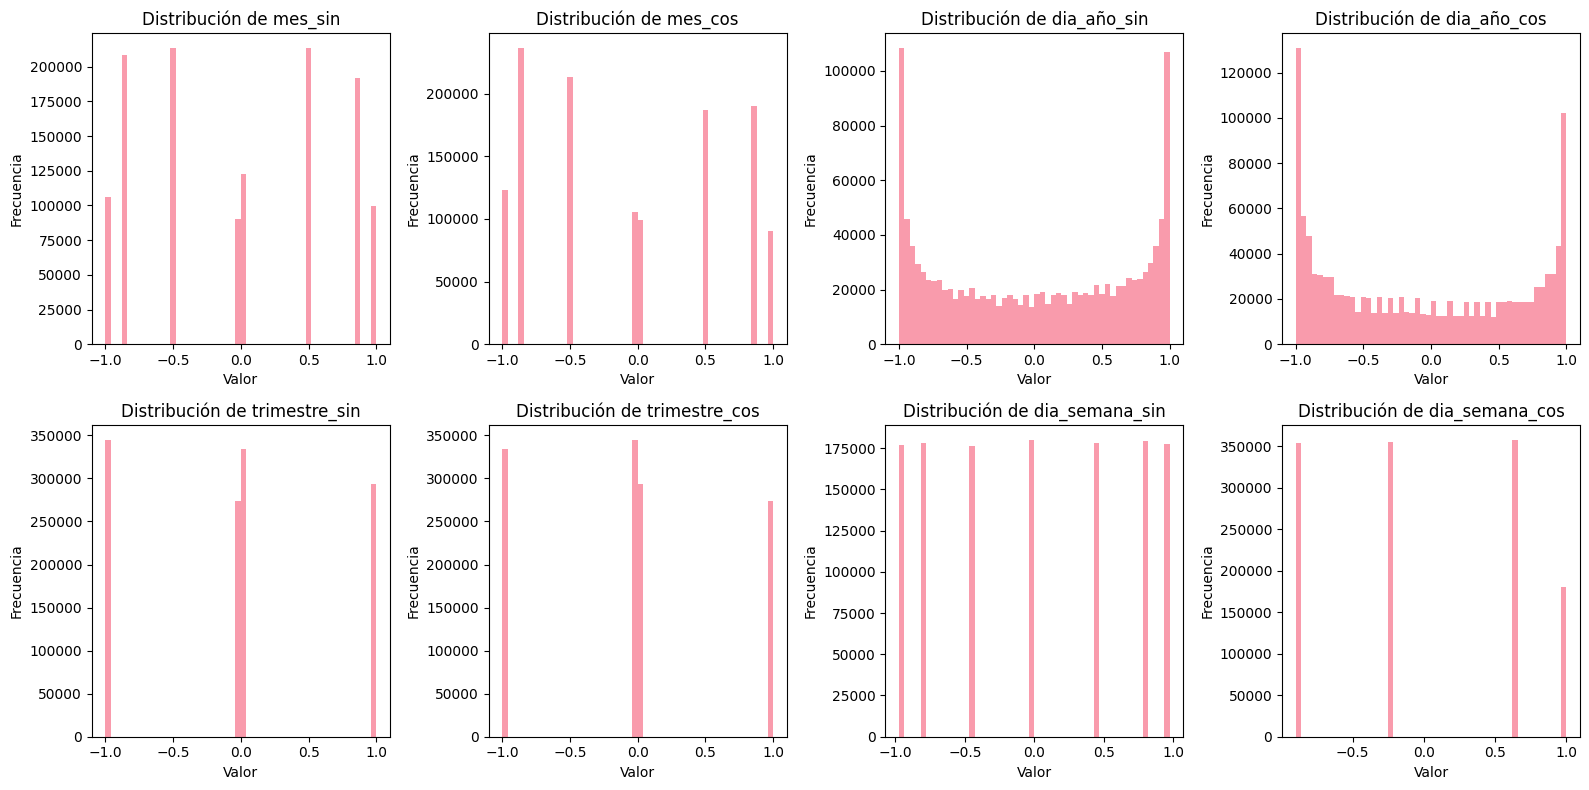

In [14]:
# Análisis de features cíclicos
if df_features is not None:
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Configurar estilo
    plt.style.use('default')
    sns.set_palette('husl')
    
    # Features cíclicos disponibles
    features_ciclicos = [col for col in df_features.columns if '_sin' in col or '_cos' in col]
    print(f" Features cíclicos encontrados: {len(features_ciclicos)}")
    print(f"Lista: {features_ciclicos}")
    
    # Visualizar distribución de features cíclicos
    if features_ciclicos:
        fig, axes = plt.subplots(2, 4, figsize=(16, 8))
        axes = axes.ravel()
        
        for i, feature in enumerate(features_ciclicos[:8]):
            if i < len(axes):
                axes[i].hist(df_features[feature].dropna(), bins=50, alpha=0.7)
                axes[i].set_title(f'Distribución de {feature}')
                axes[i].set_xlabel('Valor')
                axes[i].set_ylabel('Frecuencia')
        
        plt.tight_layout()
        plt.show()


 Features especiales encontrados: 3
Lista: ['es_fin_semana', 'es_invierno', 'es_verano']


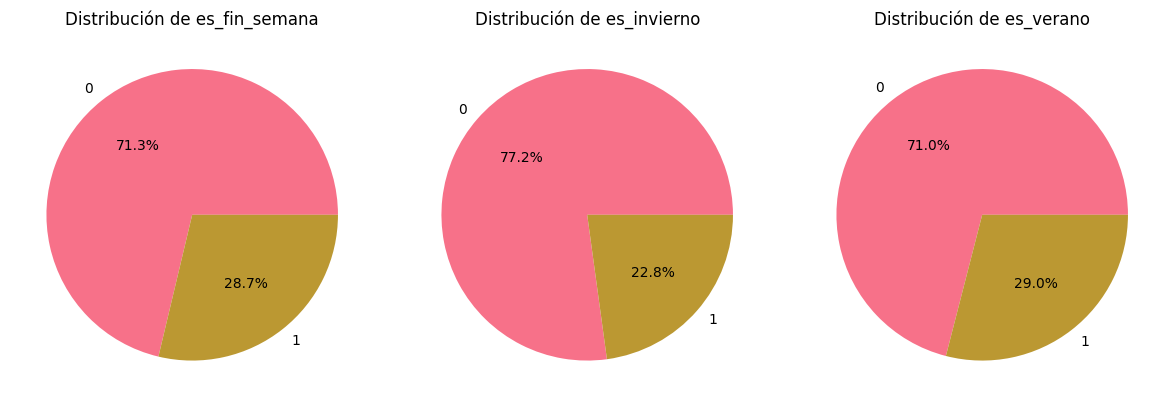

In [15]:
# Análisis de features especiales
if df_features is not None:
    # Features especiales disponibles
    features_especiales = [col for col in df_features.columns if col.startswith('es_')]
    print(f" Features especiales encontrados: {len(features_especiales)}")
    print(f"Lista: {features_especiales}")
    
    # Visualizar distribución de features especiales
    if features_especiales:
        fig, axes = plt.subplots(1, len(features_especiales), figsize=(4*len(features_especiales), 4))
        if len(features_especiales) == 1:
            axes = [axes]
        
        for i, feature in enumerate(features_especiales):
            value_counts = df_features[feature].value_counts()
            axes[i].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
            axes[i].set_title(f'Distribución de {feature}')
        
        plt.tight_layout()
        plt.show()


In [16]:
# Cargar métricas de calidad
try:
    metricas_calidad = catalog.load('metricas_calidad_datos')
    print(" Métricas de calidad cargadas")
    print(f" Métricas disponibles: {list(metricas_calidad.keys())}")
    
    # Mostrar resumen de calidad
    for dataset, metricas in metricas_calidad.items():
        print(f"\n {dataset.upper()}:")
        for metrica, valor in metricas.items():
            print(f"  {metrica}: {valor}")
except Exception as e:
    print(f" Error cargando métricas de calidad: {e}")
    metricas_calidad = None


[09/24/25 14:36:39] INFO     Loading data from metricas_calidad_datos (PickleDataset)...       ]8;id=727622;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=993458;file://C:\ProyectoML2\proyecto-ml\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

 Métricas de calidad cargadas
 Métricas disponibles: ['defunciones', 'nacimientos', 'problemas_criticos', 'estado']

 DEFUNCIONES:
  total_registros: 1246214
  total_columnas: 15
  valores_nulos: 0
  duplicados: 0
  rango_fechas: {'inicio': '2014-01-01', 'fin': '2024-09-28'}
  años_unicos: 11
  regiones_unicas: 17

 NACIMIENTOS:
  total_registros: 9
  total_columnas: 5
  valores_nulos: 0
  duplicados: 0
  años_unicos: 9

 PROBLEMAS_CRITICOS:
 Error cargando métricas de calidad: 'list' object has no attribute 'items'


In [17]:
# Análisis de parámetros utilizados
print(" PARÁMETROS UTILIZADOS EN EL PIPELINE")
print("\n Parámetros de features temporales:")
if 'features_temporales' in params:
    for key, value in params['features_temporales'].items():
        print(f"  {key}: {value}")

print("\n Parámetros de normalización:")
if 'normalizacion' in params:
    for key, value in params['normalizacion'].items():
        print(f"  {key}: {value}")

print("\n Parámetros de datasets finales:")
if 'datasets_finales' in params:
    for key, value in params['datasets_finales'].items():
        print(f"  {key}: {value}")


 PARÁMETROS UTILIZADOS EN EL PIPELINE

 Parámetros de features temporales:
  ciclicos: ['mes', 'dia_año', 'trimestre', 'dia_semana']
  especiales: ['es_fin_semana', 'es_invierno', 'es_verano', 'trimestre_fiscal']
  basicas: ['año_normalizado', 'epoca_año_codificada', 'decada']

 Parámetros de normalización:
  metodos: ['StandardScaler', 'MinMaxScaler', 'RobustScaler']
  variables_numericas: ['tipo_edad', 'edad_cantidad', 'año_fecha', 'mes', 'trimestre', 'dia_año']
  metodo_principal: StandardScaler

 Parámetros de datasets finales:
  regresion: {'variables_objetivo': ['edad_cantidad', 'año_normalizado'], 'variables_predictoras': ['mes_sin', 'mes_cos', 'dia_año_sin', 'dia_año_cos', 'trimestre_sin', 'trimestre_cos', 'dia_semana_sin', 'dia_semana_cos', 'es_fin_semana', 'es_invierno', 'es_verano', 'trimestre_fiscal', 'epoca_año_codificada']}
  clasificacion: {'variables_objetivo': ['sexo', 'region'], 'variables_predictoras': ['edad_cantidad', 'mes_sin', 'mes_cos', 'dia_año_sin', 'dia_año_c

In [18]:
# Resumen final
print(" RESUMEN FINAL DE EXPLORACIÓN")
print("\n Datasets finales creados:")
if datasets_finales:
    for nombre, df in datasets_finales.items():
        print(f"  {nombre}: {df.shape}")

print("\n Features temporales implementadas:")
if df_features is not None:
    features_ciclicos = [col for col in df_features.columns if '_sin' in col or '_cos' in col]
    features_especiales = [col for col in df_features.columns if col.startswith('es_')]
    print(f"  Cíclicos: {len(features_ciclicos)}")
    print(f"  Especiales: {len(features_especiales)}")

print("\n Métodos de normalización aplicados:")
if 'normalizacion' in params:
    metodos = params['normalizacion'].get('metodos', [])
    print(f"  {', '.join(metodos)}")

print("\n Exploración de datasets finales completada exitosamente!")


 RESUMEN FINAL DE EXPLORACIÓN

 Datasets finales creados:
  dataset_regresion: (1246214, 19)
  dataset_temporal: (1246214, 32)
  dataset_indexado: (1246214, 32)
  dataset_resumido: (129, 10)
  dataset_completo: (1246214, 31)

 Features temporales implementadas:
  Cíclicos: 8
  Especiales: 3

 Métodos de normalización aplicados:
  StandardScaler, MinMaxScaler, RobustScaler

 Exploración de datasets finales completada exitosamente!
